In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('AllMLAsy.csv')
dfm30 = df.query('theta == -30.0')
dfm20 = df.query('theta == -20.0')
dfm10 = df.query('theta == -10.0')
df0 = df.query('theta == 0.0')
dfp10 = df.query('theta == 10.0')
dfp20 = df.query('theta == 20.0')
dfp30 = df.query('theta == 30.0')

count_list = [len(dfm30), len(dfm20), len(dfm10), len(df0), len(dfp10), len(dfp20), len(dfp30)]
#count_list = [len(dfm10), len(df0), len(dfp10)]
count_min = min(count_list)

datam30 = dfm30.sample(n=count_min)
datam20 = dfm20.sample(n=count_min)
datam10 = dfm10.sample(n=count_min)
data0 = df0.sample(n=count_min)
datap10 = dfp10.sample(n=count_min)
datap20 = dfp20.sample(n=count_min)
datap30 = dfp30.sample(n=count_min)

data = pd.concat([datam30,datam20,datam10,data0,datap10,datap20,datap30])
data['Ch2'] = data['Ch2']-780
data['Ch3'] = data['Ch3']-782
data['Ch4'] = data['Ch4']-777
data['Ch5'] = data['Ch5']-782
data['Ch6'] = data['Ch6']-776
data['Ch7'] = data['Ch7']-787
#data = pd.concat([datam10,data0,datap10])
#data = data.query('theta != 0.0')
data.describe()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,r,theta,sum,Asy
count,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.00000,61495.000000,61495.0,61495.000000,61495.000000,61495.000000
mean,811.704139,220.379559,108.887275,44.498106,38.719603,44.96068,112.413578,15.0,0.000000,5253.858802,-0.037109
std,6.693761,25.310205,15.289894,7.797031,7.058578,7.78256,15.240136,0.0,20.000163,26.577261,0.105676
min,790.000000,117.000000,53.000000,16.000000,12.000000,-1.00000,0.000000,15.0,-30.000000,5201.000000,-0.437500
25%,808.000000,203.000000,99.000000,39.000000,34.000000,40.00000,102.000000,15.0,-20.000000,5233.000000,-0.108333
50%,811.000000,221.000000,107.000000,44.000000,38.000000,45.00000,112.000000,15.0,0.000000,5256.000000,-0.043062
75%,815.000000,238.000000,117.000000,49.000000,43.000000,49.00000,122.000000,15.0,20.000000,5276.000000,0.027273
max,978.000000,415.000000,194.000000,164.000000,149.000000,152.00000,190.000000,15.0,30.000000,5299.000000,0.915663


In [136]:
data = data.assign(phi37 = np.arctan(data['Ch3']/data['Ch7']))#phi23はなに？
data = data.assign(Asy37 = (data['Ch3']-data['Ch7'])/(data['Ch7']+data['Ch3']-782-787))
data = data.assign(Asy45 = (data['Ch4']-data['Ch5'])/(data['Ch4']+data['Ch5']-777-782))
data = data.assign(Asy23 = (data['Ch2']-data['Ch3'])/(data['Ch2']+data['Ch3']-782-780))
data = data.assign(Asy27 = (data['Ch2']-data['Ch7'])/(data['Ch7']+data['Ch2']-780-787))
data = data.assign(Ch34 = data['Ch3']+data['Ch4'])
data = data.assign(Ch67 = data['Ch6']+data['Ch7'])
y = data['theta']
features = ['Ch2','Ch3','Ch4','Ch5','Ch6','Ch7','Ch34','Ch67','Asy37','Asy45','Asy23','Asy27','phi37']
#features = ['asy23']
x = data[features]
train_x, val_x, train_y, val_y = train_test_split(x,y,test_size=0.2,random_state=1)

model = LinearRegression()
model.fit(train_x,train_y)

preds = model.predict(val_x)
rmse = np.sqrt(mean_squared_error(val_y, preds))
print(rmse)
data.describe()

18.218375687297815


,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,r,theta,sum,Asy,phi37,Asy37,Asy45,Asy23,Asy27,Ch34,Ch67
count,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.00000,61495.000000,61495.0,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000,61495.000000
mean,811.704139,220.379559,108.887275,44.498106,38.719603,44.96068,112.413578,15.0,0.000000,5253.858802,-0.037109,0.769393,0.002616,-0.003921,-0.090754,-0.087789,153.385381,157.374258
std,6.693761,25.310205,15.289894,7.797031,7.058578,7.78256,15.240136,0.0,20.000163,26.577261,0.105676,0.107241,0.018175,0.006437,0.027129,0.026711,18.699372,17.877358
min,790.000000,117.000000,53.000000,16.000000,12.000000,-1.00000,0.000000,15.0,-30.000000,5201.000000,-0.437500,0.377143,-0.139840,-0.083395,-0.323475,-0.325709,78.000000,0.000000
25%,808.000000,203.000000,99.000000,39.000000,34.000000,40.00000,102.000000,15.0,-20.000000,5233.000000,-0.108333,0.695593,-0.008197,-0.008081,-0.108749,-0.105434,141.000000,145.000000
50%,811.000000,221.000000,107.000000,44.000000,38.000000,45.00000,112.000000,15.0,0.000000,5256.000000,-0.043062,0.763568,0.003660,-0.004040,-0.090909,-0.087480,152.000000,157.000000
75%,815.000000,238.000000,117.000000,49.000000,43.000000,49.00000,122.000000,15.0,20.000000,5276.000000,0.027273,0.836635,0.014738,-0.000000,-0.073524,-0.069523,164.000000,169.000000
max,978.000000,415.000000,194.000000,164.000000,149.000000,152.00000,190.000000,15.0,30.000000,5299.000000,0.915663,1.570796,0.085385,0.071429,-0.002331,-0.006187,262.000000,266.000000


theta 30.0 counts 1763
26.60018439010707
theta 20.0 counts 1772
18.379564581615693
theta 10.0 counts 1713
11.099922582235338
theta 0.0 counts 1666
6.945406870458226
theta -10.0 counts 1773
9.865592715020382
theta -20.0 counts 1771
17.36238080626177
theta -30.0 counts 1841
25.934464097752127


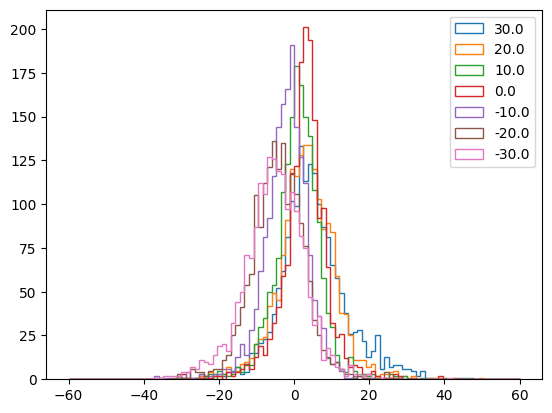

In [137]:
def get_each_rmse(theta, preds, val_y):

    p_y = preds.tolist()
    v_y = val_y.tolist()

    p_y_theta = []
    for i in range(len(v_y)):
        if v_y[i] == theta:
            p_y_theta.append(p_y[i])
    #print(p_y_theta)

    theta_array = []
    for i in range(len(p_y_theta)):
        theta_array.append(theta)
    print('theta', theta, 'counts', len(theta_array))

    rmse_theta = np.sqrt(mean_squared_error(p_y_theta, theta_array))
    print(rmse_theta)
    plt.hist(p_y_theta, bins=100, range=(-60,60), histtype='step', label=theta)

get_each_rmse(30.0, preds, val_y)
get_each_rmse(20.0, preds, val_y)
get_each_rmse(10.0, preds, val_y)    
get_each_rmse(0.0, preds, val_y)
get_each_rmse(-10.0, preds, val_y)
get_each_rmse(-20.0, preds, val_y)
get_each_rmse(-30.0, preds, val_y)
plt.legend()

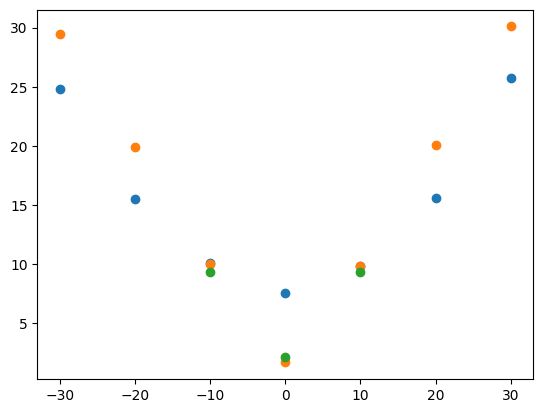

In [22]:
theta = [-30, -20, -10, 0, 10, 20, 30]
theta23 = [-10, 0, 10]
rmse15 = [24.8, 15.5, 10.1, 7.50, 9.80, 15.6, 25.7]
rmse20 =[29.5, 19.9, 10.0, 1.66, 9.85, 20.1, 30.1]
rmse23 = [9.36, 2.13, 9.33]
plt.scatter(theta, rmse15)
plt.scatter(theta, rmse20)
plt.scatter(theta23, rmse23)